# SQuadGen + UXarray Mesh Full Demo

This notebook demonstrates how to:

- Clone and build [SQuadGen](https://github.com/MPAS-Dev/SQuadGen)
- Generate a regionally refined mesh using SQuadGen (from within the notebook!)
- Visualize the mesh using [uxarray](https://github.com/UXARRAY/uxarray)

---

## Mesh Generation Steps

```sh
# 1. Clone and build SQuadGen
git clone https://github.com/MPAS-Dev/SQuadGen.git
cd SQuadGen/src
make

# 2. Add SQuadGen to your PATH (so you can call it from anywhere)
export PATH="$PATH:/Users/mbook/squadgen"

# 3. Generate a regionally refined mesh (from notebook or terminal)
SQuadGen --grid_type CS --refine_type LOWCONN --refine_level 2 --resolution 10 --output output_mesh.nc --refine_rect "-110.0,35.0,-105.0,40.0,2"
```

---

## SQuadGen Command Line Options Explained

- `--grid_type CS`: Use a Cubed Sphere grid. Other options: ICO (Icosahedral), OCT1, OCT2.
- `--refine_type LOWCONN`: Use the LOWCONN refinement scheme. Other options: CUBIT, LOWCONNOLD.
- `--refine_level 2`: Number of refinement levels to apply. Higher means more local refinement.
- `--resolution 10`: Base mesh resolution (number of cells along one edge of a panel).
- `--output output_mesh.nc`: Output filename for the generated mesh (NetCDF format).
- `--refine_rect "-110.0,35.0,-105.0,40.0,2"`: Define a rectangular region to refine.
  - Format: `lon_min,lat_min,lon_max,lat_max,refine_level`
  - Here: longitudes -110 to -105, latitudes 35 to 40, refinement level 2.

You can adjust these parameters to focus refinement on other regions or increase mesh density.


In [3]:
import os

# Prepend the SQuadGen directory to PATH for this notebook session
os.environ["PATH"] = "/Users/mbook/SQuadGen:" + os.environ["PATH"]

In [4]:
!which SQuadGen

/Users/mbook/SQuadGen/SQuadGen


In [5]:
import subprocess

mesh_file = 'output_mesh.nc'

# Only generate if not present
if not os.path.exists(mesh_file):
    cmd = [
        'squadgen',
        '--grid_type', 'CS',
        '--refine_type', 'LOWCONN',
        '--refine_level', '2',
        '--resolution', '10',
        '--output', mesh_file,
        '--refine_rect', '-110.0,35.0,-105.0,40.0,2'
    ]
    print('Generating regionally refined mesh with SQuadGen...')
    subprocess.run(cmd, check=True)
else:
    print('Mesh file already exists, skipping generation.')

Mesh file already exists, skipping generation.


---

## Visualize the Mesh with uxarray

Below, we load the generated mesh and plot it using uxarray. You can further analyze or visualize the mesh as needed.


In [6]:
import uxarray as ux
import matplotlib.pyplot as plt

mesh_file = 'output_mesh.nc'

if not os.path.exists(mesh_file):
    print(f'Mesh file not found: {mesh_file}')
else:
    mesh = ux.open_dataset(mesh_file, mesh_file)

mesh.uxgrid

<uxarray.Grid>
Original Grid Type: Exodus
Grid Dimensions:
  * n_node: 838
  * n_face: 836
  * n_max_face_nodes: 4
Grid Coordinates (Spherical):
  * node_lon: (838,)
  * node_lat: (838,)
Grid Coordinates (Cartesian):
  * node_x: (838,)
  * node_y: (838,)
  * node_z: (838,)
Grid Connectivity Variables:
  * face_node_connectivity: (836, 4)
Grid Descriptor Variables:

### Plot 1: Regional Mesh Visualization (Equirectangular Projection)

This plot displays the regionally refined mesh generated by SQuadGen, visualized using uxarray’s matplotlib backend in a standard equirectangular (longitude-latitude) projection. The refinement region, specified by the rectangle `[-110, 35, -105, 40]`, is visible as a denser cluster of grid cells. This visualization helps verify that the mesh refinement parameters were applied as intended and provides an overview of the grid structure across the domain.

:Path   [Longitude,Latitude]
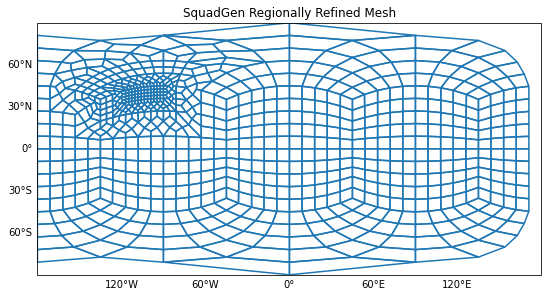

In [20]:
mesh.uxgrid.plot(title='SquadGen Regionally Refined Mesh', backend='matplotlib', height=500, width=750,)

### Plot 2: Mesh Visualization on Orthographic (Globe) Projection

This plot shows the same regionally refined mesh, but projected onto an orthographic (globe-like) view centered near the refinement region. This perspective offers a more intuitive geographic context for the mesh, making it easier to assess the placement and density of the refined area relative to the rest of the globe. Such visualizations are especially useful for geoscientific applications, where the spatial distribution of grid resolution is critical.

:Path   [Longitude,Latitude]
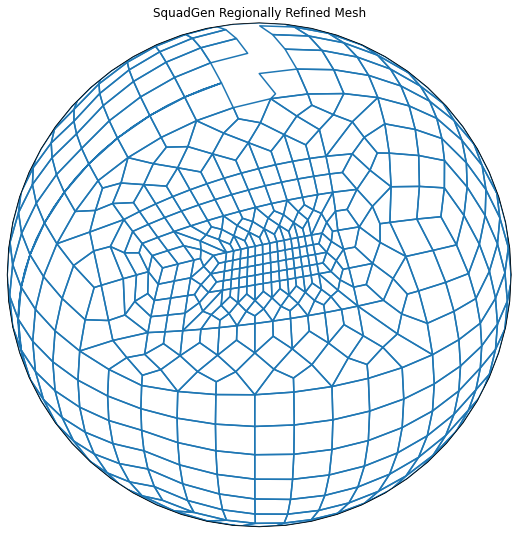

In [19]:
import cartopy.crs as ccrs

mesh.uxgrid.plot(title='SquadGen Regionally Refined Mesh', backend='matplotlib', height=500, width=750, projection=ccrs.Orthographic(central_latitude=37, central_longitude=-107),)